# IODA-exclusion notebook

**Purpose**: This notebook generates exclusion table formatted for XCalibur and MaxQuant.Live. It accepts as input one mzTab file from one sample data for the ions to exclude. If you need to generate a mzTab, we recommend using the following TOPPAS/OpenMS. Please refer to this page for more informations or the TOPPAS/OpenMS for IODA-exclusion worklow. N
to this workflow and/or the documentation. 

**Instructions**: 
- Provide the mzTab for the sample data to be used. 
- Modify the variables below as needed.

In [1]:
#Automate that in the Binder env
from IODA_exclusion_workflow import *

============================

### Step 1 - Provide the input mzTab file

#### Method 1 
Upload your mzTab with the Jupyter lab interface (left vertical panel: File / Upload icon).

#### Method 2
We support downloading the mzTab file from the following cloud sharing services:
- **Google Drive** (recommended): obtain the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').
- **GoFile**: obtain the download sharing link from a file upload to [https://gofile.io/](https://gofile.io/) (make sure this is the actual downloading link).

**Specificy the file name or sharing link in the *input_filename* variable in the cell below**. (The string must be between parenthesis).

In [2]:
input_filename = 'filenameORsharinglink'

============================
### Step 2 - Specify the variables for the workflow
**Specify the variables for exclusion list in the cell below**

*min_intensity*: the minimum intensity for the ion/feature to be retained in the inclusion list.

*rt_exclusion_margin*: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range.

In [3]:
min_intensity = 100
rt_exclusion_margin = 5

In [5]:
#Debug variables
#input_filename = 'https://drive.google.com/file/d/1LYk-PKsBWl4Pv7c1TlhQwaqwkF2T6sux/view?usp=sharing'
#input_filename = 'https://srv-file18.gofile.io/download/JauERx/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab' #https://gofile.io/uploadFiles
input_filename = 'tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab'

============================
### Step 3 - Run the cell below

Beside running the cell below, no action is needed.

Starting the workflow
This is the input file path: tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab
This is the output file path: results/Euphorbia_rogers_latex_Blank_MS1_2uL.csv
tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab
Converting mzTab to table format
Filename(s) in the mzTab
['Euphorbia_rogers_latex_Blank_MS1_2uL']
Assumed blank sample name: Euphorbia_rogers_latex_Blank_MS1_2uL
User-defined parameters
Minimum ion intensity treshold (count) = 100
Additional margin for retention time range exclusion (seconds) = 5
Preparing the table
Initial number of features = 436
Number of features in the blank sample = 436, with intensity >100
Preparing list of excluded ions in XCalibur format
Preparing list of excluded ions in MaxQuant.Live format
Plotting the ions excluded
 


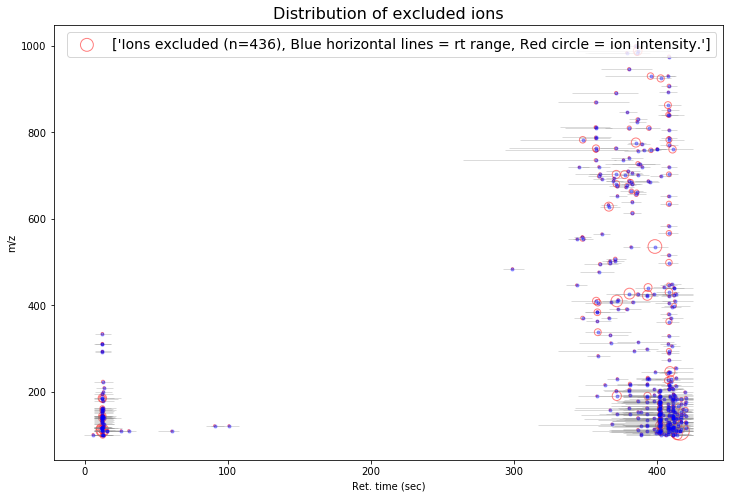

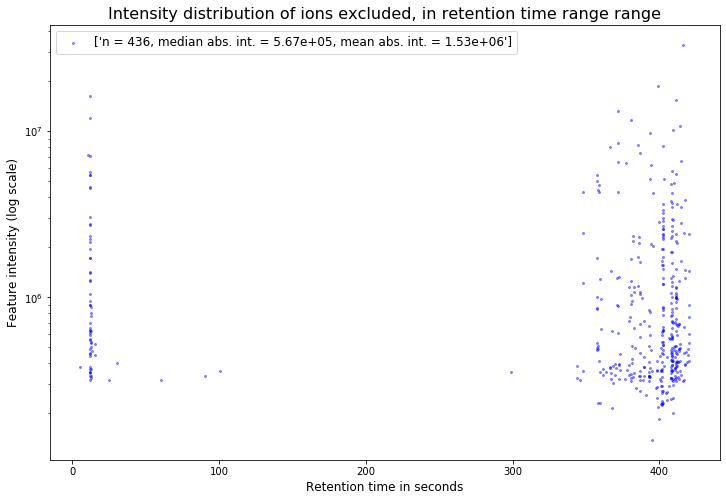

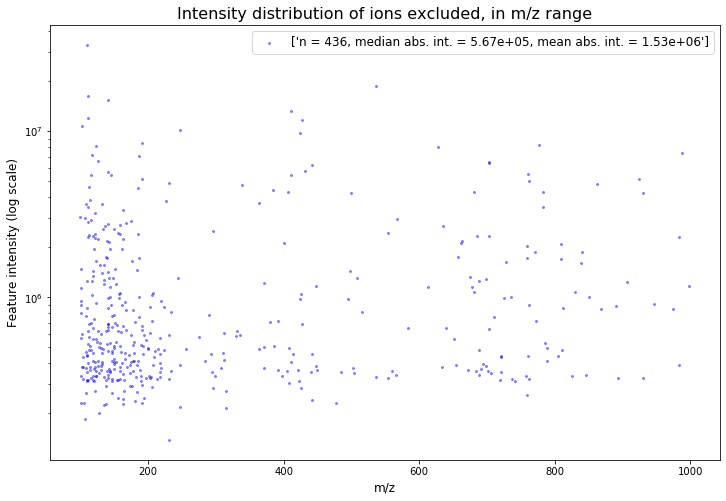

In [6]:
make_exclusion_from_mzTab(input_filename, min_intensity, rt_exclusion_margin)

============================
### Step 4 - Examine the results

- Examine the IODA-exclusion worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

### Step 5 - Download the results

Download the result file at
[results/IODA_exclusion_results.zip](results/IODA_exclusion_results.zip?download=1)

### Step 6 - Prepare your acquisition method
For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).